<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Добавление-данных-в-тестовую-выборку" data-toc-modified-id="Добавление-данных-в-тестовую-выборку-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление данных в тестовую выборку</a></span></li><li><span><a href="#Проверка-расчёта-recovery" data-toc-modified-id="Проверка-расчёта-recovery-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка расчёта recovery</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span></li><li><span><a href="#Подбор-и-обучение-модели." data-toc-modified-id="Подбор-и-обучение-модели.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подбор и обучение модели.</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Бэггинг" data-toc-modified-id="Бэггинг-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Бэггинг</a></span></li><li><span><a href="#Сводные-данные-по-моделям" data-toc-modified-id="Сводные-данные-по-моделям-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Сводные данные по моделям</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Восстановление золота из руды

## Обзор данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
pd.set_option('display.float_format', '{:,.3f}'.format) #настройка, чтобы числа показывались с 3мя знаками после запятой и разделителем разрядов
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import RandomState
from scipy import stats as st
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import BaggingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [2]:
#читаем файлы, выводим информацию о датасете
#try - адрес у меня, except - адрес для проверки
try:
    data_train = pd.read_csv('datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('datasets/gold_recovery_full_new.csv')
except FileNotFoundError:
    print("file doesn't exist")

In [3]:
datasets = [data_train,data_test,data_full]
datasets_names = ['обучающей выборке', 'тестовой выборке', 'полной выборке']
i_name = 0
for data in datasets:
    print('\033[1m'+'Информация по '+datasets_names[i_name])
    display(data.head())
    print()
    print('Общая информация о датафрейме')
    display(data.info())
    print()
    print('Доли пропусков по столбцам')
    print(data.isna().mean())
    print()
    print('Количество пропусков по столбцам')
    print(data.isna().sum())
    print()

    print('Статистическая информация о датафрейме')
    display(data.describe())
    print()
    print('Проверка наличия дублирующихся строк')
    if data.duplicated().sum()==0:
        print('Дублирующиеся строки отсутствуют')
    else:
        print('Содержит'+data.duplicated().sum()+'дублирующихся строк')
    print()
    i_name += 1
    

Информация по обучающей выборке


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,10.128,7.250,0.989,8.548,10.390,19.529,34.174,14.937,2.535,7.476,2.107,"1,549.776",-498.912,"1,551.434",-516.403,"1,549.874",-498.667,"1,554.367",-493.428,"41,885.707","3,481.779","3,520.337",2.839,6.100,2.285,523.546,55.487,36.809,6.486,11.987,6.008,11.837,6.006,11.501,7.101,28.029,19.794,87.108,5.008,0.509,19.154,1.170,999.707,-404.067,"1,603.011",-434.715,"1,602.375",-442.204,"1,598.937",-451.294,"1,404.472",-455.463,"1,416.355",-451.940,14.500,4.695,8.765,2.606,25.853,-498.526,23.894,-501.406,23.962,-495.263,21.940,-499.341,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
1,2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,10.296,7.250,1.003,8.559,10.497,19.369,34.119,16.251,3.050,6.734,2.353,"1,576.167",-500.905,"1,575.951",-499.866,"1,575.994",-499.315,"1,574.479",-498.932,"42,050.862","3,498.371","3,489.982",2.859,6.161,2.266,525.291,57.279,35.753,6.479,11.971,6.006,11.996,6.013,11.616,7.279,28.067,


Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                        

None


Доли пропусков по столбцам
date                                                 0.000
final.output.concentrate_ag                          0.000
final.output.concentrate_pb                          0.000
final.output.concentrate_sol                         0.015
final.output.concentrate_au                          0.000
final.output.recovery                                0.000
final.output.tail_ag                                 0.000
final.output.tail_pb                                 0.007
final.output.tail_sol                                0.000
final.output.tail_au                                 0.000
primary_cleaner.input.sulfate                        0.001
primary_cleaner.input.depressant                     0.002
primary_cleaner.input.feed_size                      0.000
primary_cleaner.input.xanthate                       0.007
primary_cleaner.output.concentrate_ag                0.000
primary_cleaner.output.concentrate_pb                0.006
primary_cleaner.output.conce

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"14,148.000","14,148.000","13,938.000","14,149.000","14,149.000","14,149.000","14,049.000","14,144.000","14,149.000","14,129.000","14,117.000","14,149.000","14,049.000","14,149.000","14,063.000","13,863.000","14,149.000","14,148.000","14,134.000","14,103.000","14,149.000","14,145.000","14,148.000","14,145.000","14,148.000","14,147.000","14,148.000","14,146.000","14,148.000","14,148.000","14,148.000","14,148.000","14,149.000","14,149.000","14,049.000","14,141.000","14,005.000","14,071.000","14,149.000","14,120.000","14,141.000","14,113.000","13,721.000","14,149.000","14,149.000","14,127.000","14,149.000","14,149.000","14,148.000","14,149.000","14,149.000","14,149.000","14,148.000","14,148.000","14,148.000","14,148.000","14,148.000","14,148.000","14,149.000","14,149.000","13,713.000","14,149.000","14,149.000","14,149.000","14,147.000","14,139.000","12,544.000","14,149.000","13,932.000","14,148.000","14,128.000","14,148.000","14,145.000","14,148.000","14,148.000","14,148.000","14,143.000","14,148.000","14,148.000","14,148.000","14,148.000","14,148.000","14,1


Проверка наличия дублирующихся строк
Дублирующиеся строки отсутствуют

Информация по тестовой выборке


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.801,14.993,8.080,1.005,"1,398.981",-500.226,"1,399.145",-499.920,"1,400.103",-500.704,"1,399.002",-499.485,13.129,5.637,489.794,62.710,42.022,12.084,16.923,6.153,16.868,6.151,"1,001.849",-350.301,"1,249.739",-399.108,"1,249.751",-399.397,"1,198.288",-399.489,999.472,-399.531,949.566,-398.181,24.938,-500.491,14.948,-500.014,20.018,-450.396,13.987,-449.832,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709
1,2016-09-01 01:59:59,215.392,14.987,8.080,0.990,"1,398.778",-500.057,"1,398.055",-499.778,"1,396.151",-499.240,"1,399.508",-500.416,13.036,5.526,490.105,61.961,41.188,11.919,17.003,5.999,16.996,6.002,998.691,-350.426,"1,248.395",-399.946,"1,249.514",-399.631,"1,200.506",-399.942,"1,000.002",-399.492,950.200,-405.788,24.923,-499.814,14.931,-500.764,19.989,-450.114,14.093,-450.059,12.058,-498.696,8.131,-499.634,7.958,-525.840,4.879,-500.162,25.020,-499.819
2,2016-09-01 02:59:59,215.260,12.885,7.787,0.996,"1,398.494",-500.868,"1,398.860",-499.765,"1,398.076",-502.152,"1,399.497",-499.715,13.138,5.427,489.618,66.904,42.546,12.091,16.993,5.851,16.982,5.854,998.517,-349.784,"1,247.441",-400.264,"1,248.207",-401.074,"1,199.770",-400.791,999.926,-399.237,950.320,-400.864,24.909,-500.304,14.997,-500.994,20.040,-450.263,14.078,-449.661,11.962,-498.767,8.097,-500.827,8.071,-500.802,4.905,-499.829,24.995,-500.623
3,2016-09-01 03:59:59,215.336,12.007,7.640,0.864,"1,399.618",-498.864,"1,397.440",-499.211,"1,400.129",-498.356,"1,401.065",-501.039,12.401,5.115,476.618,59.866,41.060,12.182,16.532,5.802,16.515,5.804,"1,000.277",-350.173,"1,251.323",-398.655,"1,250.494",-399.747,"1,199.399",-397.503,"1,001.931",-400.438,950.735,-399.803,24.894,-499.382,14.917,-499.862,20.031,-449.373,14.014,-449.527,12.033,-498.351,8.075,-499.474,7.897,-500.869,4.931,-499.964,24.949,-498.710
4,2016-09-01 04:59:59,199.099,10.683,7.530,0.806,"1,401.268",-500.808,"1,398.129",-499.505,"1,402.172",-500.811,"1,399.481",-499.374,11.327,4.767,488.248,63.315,41.269,11.290,13.607,5.738,13.650,5.740,996.541,-350.563,"1,304.659",-399.512,"1,306.456",-399.051,"1,248.699",-400.877,


Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-n

None


Доли пропусков по столбцам
date                                         0.000
primary_cleaner.input.sulfate                0.001
primary_cleaner.input.depressant             0.001
primary_cleaner.input.feed_size              0.000
primary_cleaner.input.xanthate               0.001
primary_cleaner.state.floatbank8_a_air       0.000
primary_cleaner.state.floatbank8_a_level     0.000
primary_cleaner.state.floatbank8_b_air       0.000
primary_cleaner.state.floatbank8_b_level     0.000
primary_cleaner.state.floatbank8_c_air       0.000
primary_cleaner.state.floatbank8_c_level     0.000
primary_cleaner.state.floatbank8_d_air       0.000
primary_cleaner.state.floatbank8_d_level     0.000
rougher.input.feed_ag                        0.000
rougher.input.feed_pb                        0.000
rougher.input.feed_rate                      0.001
rougher.input.feed_size                      0.000
rougher.input.feed_sol                       0.004
rougher.input.feed_au                        0.000
rou

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"5,286.000","5,285.000","5,290.000","5,286.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,287.000","5,289.000","5,269.000","5,290.000","5,285.000","5,290.000","5,282.000","5,265.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,287.000","5,290.000","5,288.000","5,290.000","5,281.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000","5,290.000"
mean,174.840,8.684,7.266,1.384,"1,539.494",-497.666,"1,545.174",-500.273,"1,527.272",-498.331,"1,544.844",-500.200,9.372,3.798,489.801,55.951,37.717,9.335,13.856,6.468,13.922,6.512,"1,053.400",-395.733,"1,318.927",-475.241,"1,301.595",-474.837,"1,214.848",-475.682,"1,056.649",-469.030,997.950,-470.482,26.313,-502.751,21.949,-501.987,25.403,-507.490,20.982,-506.628,16.320,-505.145,13.735,-463.350,12.804,-501.329,9.881,-495.663,17.305,-501.793
std,43.027,3.072,0.610,0.643,116.798,19.952,122.225,32.968,122.538,21.965,124.773,31.045,1.926,0.955,108.036,19.082,5.491,1.620,3.351,1.065,3.224,0.887,121.139,91.086,156.450,45.649,171.270,45.860,185.763,47.845,131.543,59.326,128.219,60.759,3.430,28.757,4.355,34.583,6.526,47.621,6.736,44.529,3.494,31.427,3.430,86.189,3.027,17.951,2.868,34.535,4.537,39.044
min,2.566,0.004,5.650,0.005,0.000,-795.316,0.000,-799.997,0.000,-799.961,0.000,-799.794,0.568,0.274,0.003,0.046,1.393,0.569,0.001,0.001,0.000,0.007,-0.042,-657.950,-0.722,-650.245,-0.057,-647.544,-0.992,-648.391,-1.982,-649.268,-2.593,-649.949,0.205,-784.091,0.006,-797.784,0.000,-799.756,0.000,-809.333,0.000,-799.799,0.000,-800.837,0.069,-797.324,0.528,-800.220,-0.079,-809.741
25%,147.121,6.490,6.890,0.908,"1,498.936",-500.357,"1,498.971",-500.703,"1,473.230",-501.018,"1,499.481",-500.452,8.112,3.240,407.021,43.906,34.506,8.208,11.995,5.999,11.997,5.999,999.205,-499.921,"1,200.872",-500.256,"1,199.651",-500.234,"1,093.368",-500.441,999.361,-500.191,901.025,-500.625,24.942,-500.207,2


Проверка наличия дублирующихся строк
Дублирующиеся строки отсутствуют

Информация по полной выборке


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,10.128,7.250,0.989,8.548,10.390,19.529,34.174,14.937,2.535,7.476,2.107,"1,549.776",-498.912,"1,551.434",-516.403,"1,549.874",-498.667,"1,554.367",-493.428,"41,885.707","3,481.779","3,520.337",2.839,6.100,2.285,523.546,55.487,36.809,6.486,11.987,6.008,11.837,6.006,11.501,7.101,28.029,19.794,87.108,5.008,0.509,19.154,1.170,999.707,-404.067,"1,603.011",-434.715,"1,602.375",-442.204,"1,598.937",-451.294,"1,404.472",-455.463,"1,416.355",-451.940,14.500,4.695,8.765,2.606,25.853,-498.526,23.894,-501.406,23.962,-495.263,21.940,-499.341,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
1,2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,10.296,7.250,1.003,8.559,10.497,19.369,34.119,16.251,3.050,6.734,2.353,"1,576.167",-500.905,"1,575.951",-499.866,"1,575.994",-499.315,"1,574.479",-498.932,"42,050.862","3,498.371","3,489.982",2.859,6.161,2.266,525.291,57.279,35.753,6.479,11.971,6.006,11.996,6.013,11.616,7.279,28.067,


Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                        

None


Доли пропусков по столбцам
date                                                 0.000
final.output.concentrate_ag                          0.000
final.output.concentrate_pb                          0.000
final.output.concentrate_sol                         0.011
final.output.concentrate_au                          0.000
final.output.recovery                                0.000
final.output.tail_ag                                 0.000
final.output.tail_pb                                 0.005
final.output.tail_sol                                0.000
final.output.tail_au                                 0.000
primary_cleaner.input.sulfate                        0.001
primary_cleaner.input.depressant                     0.002
primary_cleaner.input.feed_size                      0.000
primary_cleaner.input.xanthate                       0.005
primary_cleaner.output.concentrate_ag                0.000
primary_cleaner.output.concentrate_pb                0.006
primary_cleaner.output.conce

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"19,438.000","19,438.000","19,228.000","19,439.000","19,439.000","19,438.000","19,338.000","19,433.000","19,439.000","19,415.000","19,402.000","19,439.000","19,335.000","19,439.000","19,323.000","19,069.000","19,439.000","19,435.000","19,418.000","19,377.000","19,439.000","19,435.000","19,438.000","19,435.000","19,438.000","19,437.000","19,438.000","19,436.000","19,438.000","19,437.000","19,437.000","19,437.000","19,439.000","19,439.000","19,339.000","19,428.000","19,294.000","19,340.000","19,439.000","19,405.000","19,431.000","19,395.000","18,986.000","19,439.000","19,439.000","19,416.000","19,439.000","19,439.000","19,438.000","19,439.000","19,439.000","19,439.000","19,438.000","19,438.000","19,438.000","19,438.000","19,438.000","19,438.000","19,439.000","19,439.000","19,003.000","19,439.000","19,439.000","19,439.000","19,437.000","19,427.000","17,691.000","19,439.000","19,219.000","19,438.000","19,416.000","19,438.000","19,426.000","19,438.000","19,438.000","19,438.000","19,433.000","19,438.000","19,438.000","19,438.000","19,438.000","19,438.000","19,4


Проверка наличия дублирующихся строк
Дублирующиеся строки отсутствуют



Итак, по всей видимости перед нами данные ежечасных замеров показателей технологического процесса на различных стадиях, а также ряд расчётных показателей (с типом calculate), способ расчета которых нам неизвестен.   
Данные вызывают большое количество вопросов: какие единицы измерения у показателей; проходит ли сырье на этапе обработки последовательно все флотационные установки, или они работают параллельно; почему для одной и той же флотационной установке несколько показателей объема вохдуха и уровня жидкости с разными буквенными обозначениями.

**Первичные выводы по данным**
1. В 63 колонках есть пропуски, причем для всех выборок эти колонки идентичны. Для последующего использования при обучении моделей необходимо их обработать.
2. Наименования колонок не соответствуют стандартам, но поскольку именно так они заданы в ТЗ для понимания процесса, оставим без изменений.
3. В столбце 'date' даты представлены в формате object. Необходимо заменить на формат datetime для дальнейшей корректной работы с временным рядом.
4. Большая часть показателей имеет минимальное значение равное нулю, в т.ч. финальные концентрации веществ. Это может быть связано с технологическим процессом, но в рабочей задаче лучше уточнить, какие значения показателей являются минимально и максимально допустимыми.
5. Максимальные значения показателей 'rougher.output.recovery' и 'final.output.recovery' равны 100, что характерно для идеального технологического процесса. Необходимо перепроверить расчет показателей.
6. В тестовой выборке присутствуют не все показатели, которые есть в обучающей и общей выборках. Отсутствуют расчётные показатели (с типом "calculate"), а также информация о концентрации веществ в продукте на выходе каждой из стадий технологического процесса. Судя по всему либо это информация касающаяся не технологического процесса, а являющаяся скорее свойствами сырья, либо информация, появляющаяся спустя какое-то время после анализа проб сырья и проведения расчётов. Соответственно, это необходимо учесть при обучении модели.
7. Странно, что для вторичной очистки нет показателей концентрации элементов в продукте.

## Подготовка данных.

### Изменение типа данных

In [4]:
#изменение формата данных на дату
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

### Обработка пропусков

Исходя из полученных в предыдущем разделе данных, количество пропусков не слишком велико: максимум это 9% в столбце 'secondary_cleaner.output.tail_sol'. Тем не менее, удалять такое количество данных было бы некорректно.  
В рабочей задаче нужно было бы выяснить прчиину возникновения пропусков: возможно, это проблема выгрузки данных, и пропуски возможно восстановить. Но также причиной возникновения пропусков может быть, например, временный выход какого-то из датчиков из строя.  
В условиях сказано, что близкие по времени данные имеют похожие значения. Соответственно, для небольшого количества пропусков можно заменить пропущенные значения на значение из предыдущих и следующих строк. Но если в данных есть выбросы, то аткой способ замены приведёт к риску дублирования таких выбросов.  
Замена средним или медианным значением может привести к тому, что будет нарушена логическая последовательность значений показателей во времени.  
Также можно было бы воспользоваться предсказанием параметров с помощью алгоритмов машинного обучения (например, линейной регрессии), но здесь нужно понимать, насколько она применима для таких данных.  
Поскольку данные обучающей и тетсовой выборки согласно заданию получены на основании общей выборки, логично будет заполнить пропуски в общей выборке, а потом подтянуть эти значения в обучающую и тестовую.  
Посмотрим на пропущенные данные в различных столбцах.

In [ ]:
data_full[data_full['final.output.concentrate_ag'].isna()]

In [ ]:
# выведем строки вокруг пропущенного значения
data_full.loc[2867:2871,:]

Действительно, данные в столбцах с пропусками довольно близки между собой и показывают тенденцию к снижению. Поэтому можно заменить на значения предыдущих столбцов.

In [ ]:
data_full[data_full['final.output.concentrate_sol'].isna()]

Здесь нужно отметить, что пропуски в столбце часто идут подряд, как будто бы датчик не работал какое-то время (в случае с индексами 331-343 - в течение 12 часов). Если заполнить пропуски предыдущим (или последующим) значением, есть риск не учесть обычную для технологического процесса динамику.  
Оценим возможность применения регрессионной модели. Для этого построим графики зависимости непустых значений в столбцах с пропусками более 100 от периода.

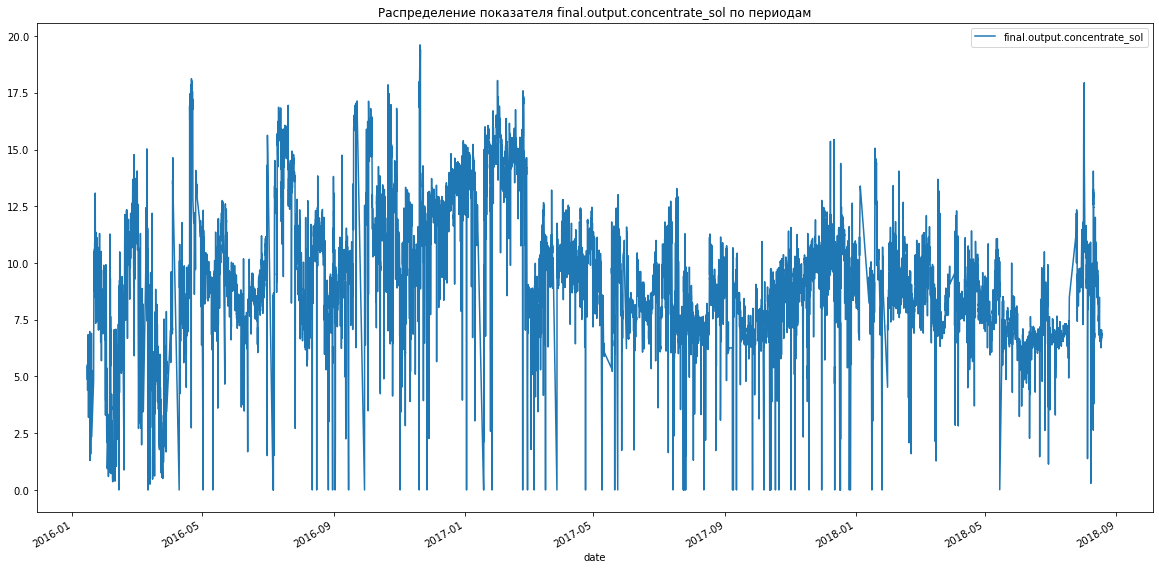

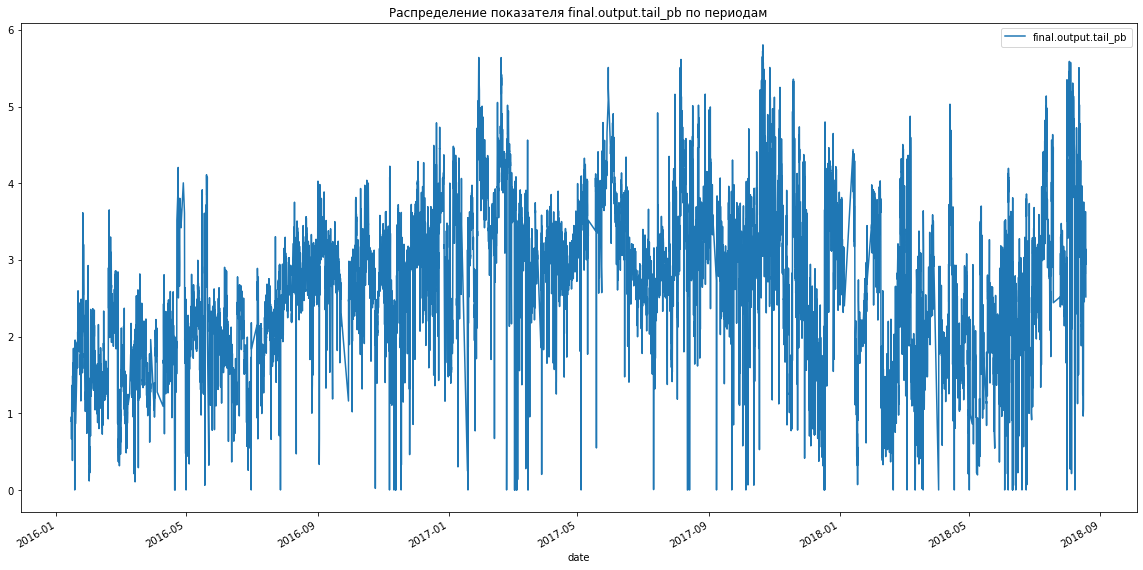

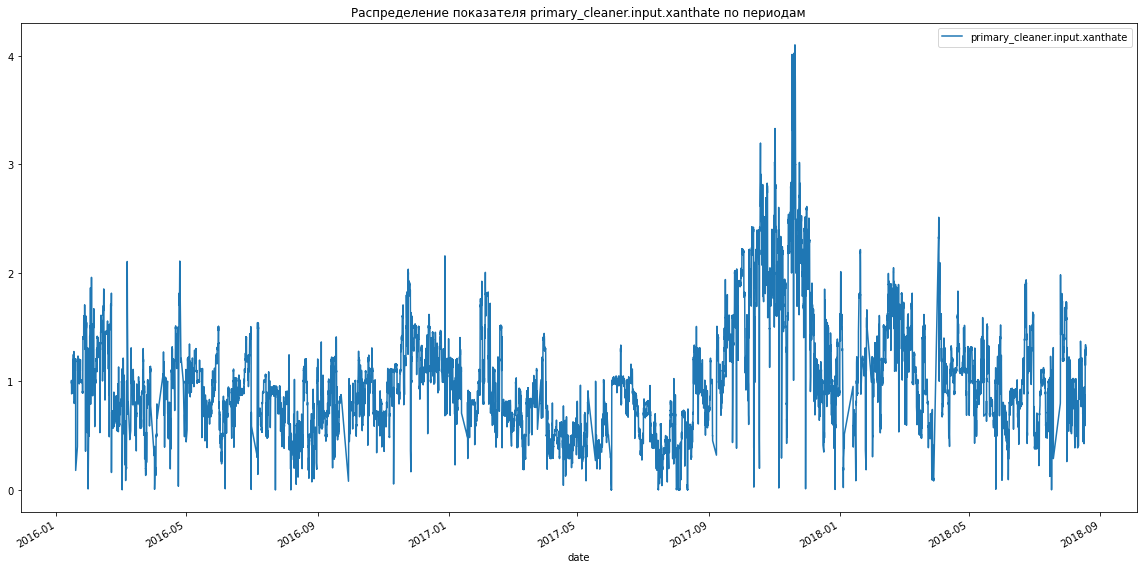

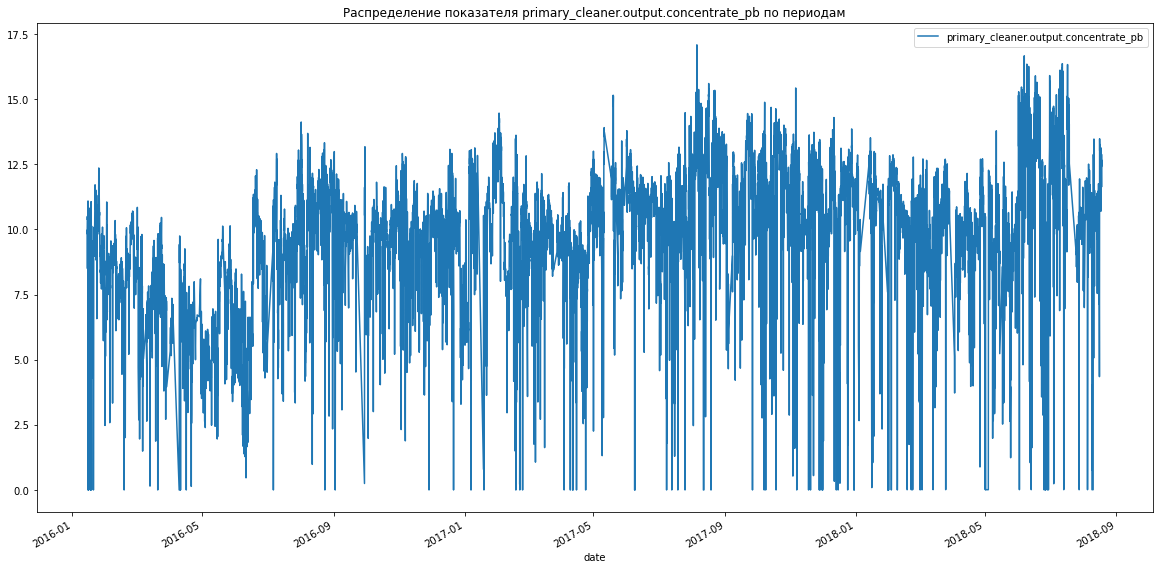

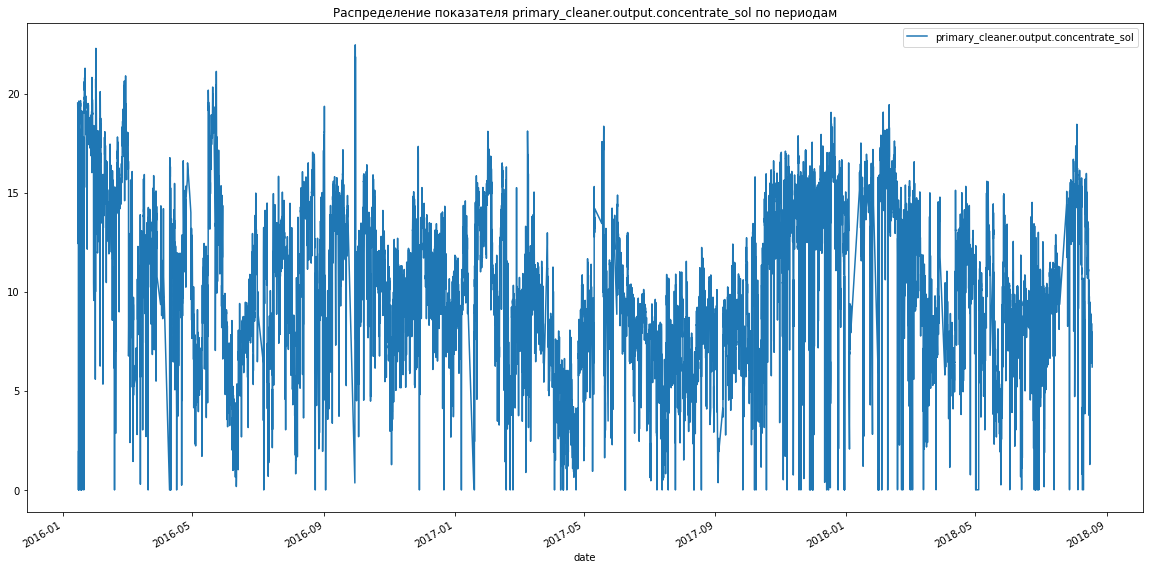

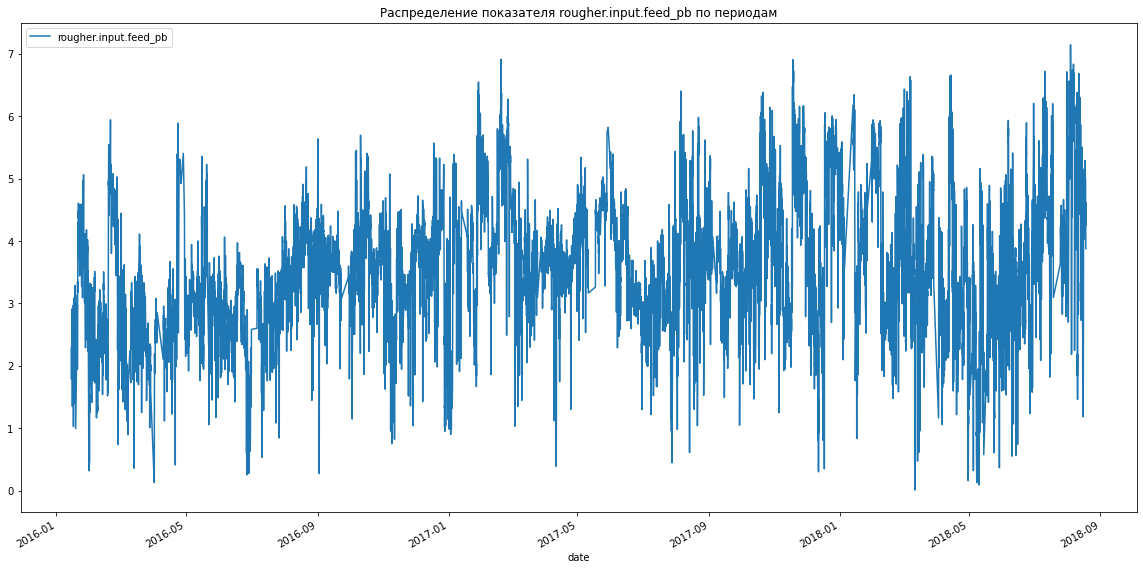

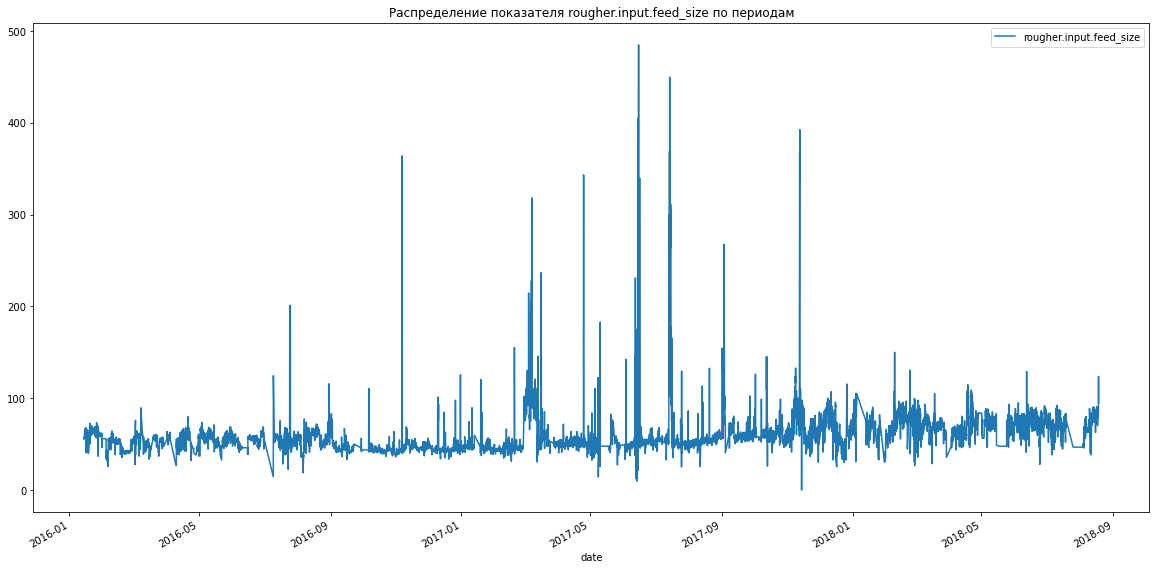

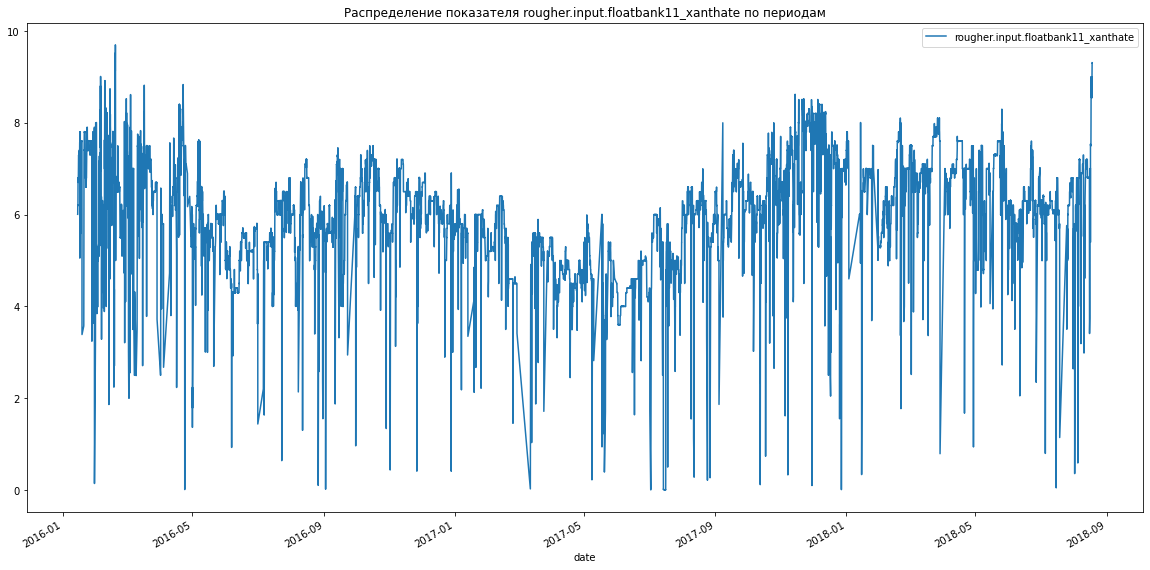

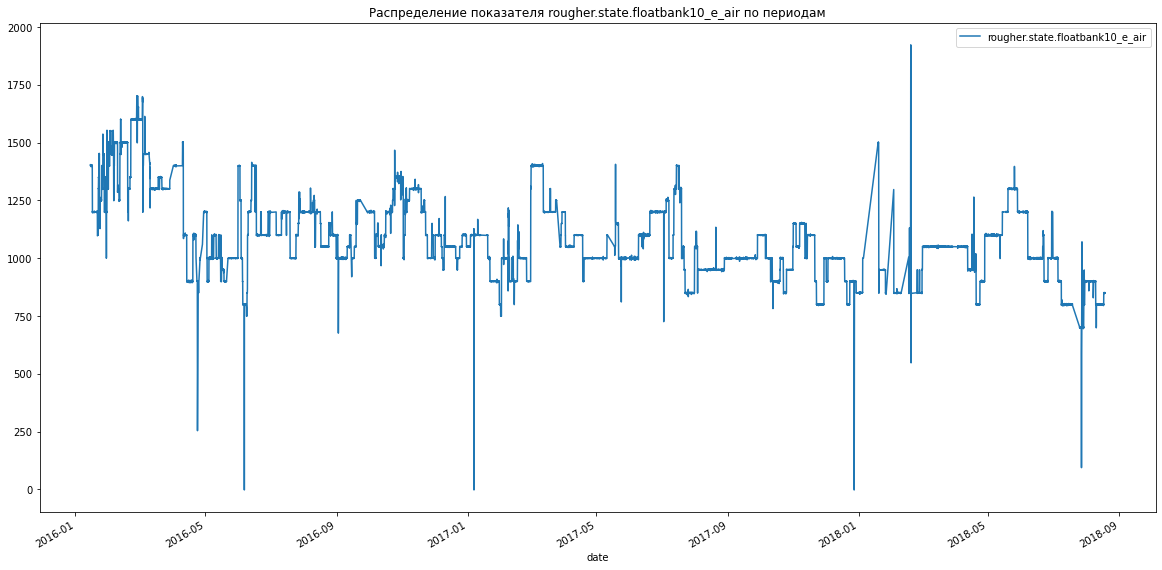

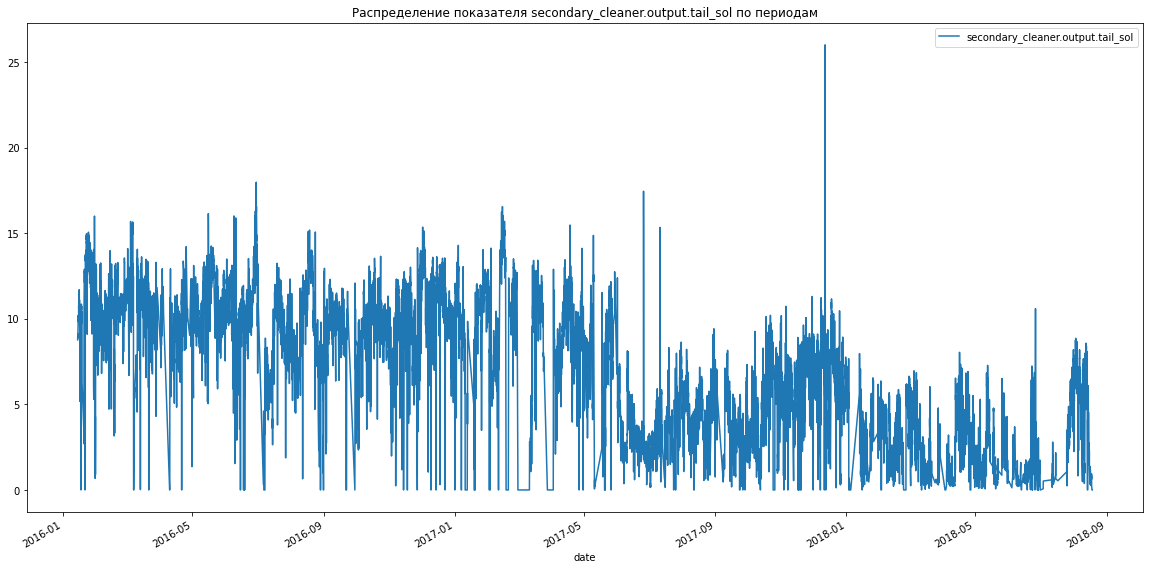

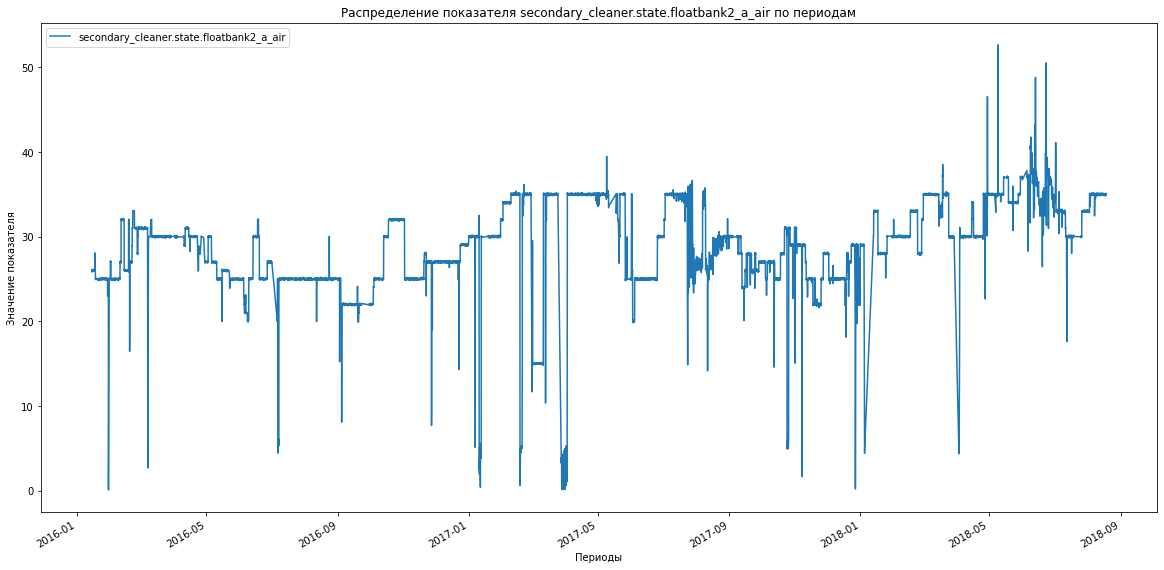

In [8]:
missed_values_list = []
for column in data_full.columns:
    if data_full[column].isna().sum()>=100:
        missed_values_list.append(column) 

for column in missed_values_list:
    data_full[~data_full[column].isna()].plot(x='date',y=column,
               figsize=(20,10), title='Распределение показателя '+ column+' по периодам')
plt.xlabel('Периоды')
plt.ylabel('Значение показателя');

На графиках видно, что хотя некоторая зависимость прослеживается, для многих точек отклонение от предсказания при применении регрессии (линейной или другой функции) будет достаточно существенным.  
Поэтому здесь с учетом инфомрации о близости соседних значений логичнее будет заполнить пропуски с помощью функции линейной интерполяции.  
Проверим это на одном столбце.

In [ ]:
# выведем часть данных до применения метода
data_full[300:350]

In [10]:
# применим метод для столбца 'final.output.concentrate_sol'
data_full['final.output.concentrate_sol'] = data_full['final.output.concentrate_sol'].interpolate()

In [ ]:
# выведем ту же часть данных после применения метода
data_full[300:350]

Видим, что пропуски заполнились достаточно плавно между значениями до и после пропусков.  
Применим этот метод к столбцам всей выборки.

In [12]:
# собираем перечень столбцов с пропусками
missed_values_list = []
for column in data_full.columns:
    if data_full[column].isna().sum()>=1:
        missed_values_list.append(column)

# применяем линейную интерполяцию        
for column in missed_values_list:
    data_full[column] = data_full[column].interpolate()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

Пропуски в основной выборке заполнены.  
Теперь по аналогии заполним пропуски в обучающей и тестовой выборке данными из основной выборки.   
Чтобы данные корректно подтянулись, установим индексы в датафреймах по столбцу 'date', т.к. в условиях сказано, что данные индексируются этим признаком.

In [13]:
data_full = data_full.set_index('date')
data_train = data_train.set_index('date')
data_test = data_test.set_index('date')

In [14]:
# Добавляем данные в обучающую выборку
# собираем перечень столбцов с пропусками
missed_values_list = []
for column in data_train.columns:
    if data_train[column].isna().sum()>=1:
        missed_values_list.append(column)

# заменяем пропуски в столбцах на значения из общей выборки, соответствующие по индексу и столбцу
# выводим список ошибок: отклонение значений в заменяемых столбцах между выборками
mae_list = []
for column in missed_values_list:
    data_train.loc[data_train[column].isna(),column] = data_full.loc[data_train[column].isna().index,column]
    mae = mean_absolute_error(data_train.loc[:,column],data_full.loc[data_train.index,column])
    mae_list.append(round(mae,10))

print(data_train.info())
display(data_train.head())

# проверка ошибок при замене
if sum(mae_list) == 0:
    print('Данные в выборках после замены соответствуют друг другу')
else:
    print('Есть ошибки!', sum(mae_list))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055,9.890,5.507,42.192,70.541,10.412,0.895,16.904,2.143,127.092,10.128,7.250,0.989,8.548,10.390,19.529,34.174,14.937,2.535,7.476,2.107,"1,549.776",-498.912,"1,551.434",-516.403,"1,549.874",-498.667,"1,554.367",-493.428,"41,885.707","3,481.779","3,520.337",2.839,6.100,2.285,523.546,55.487,36.809,6.486,11.987,6.008,11.837,6.006,11.501,7.101,28.029,19.794,87.108,5.008,0.509,19.154,1.170,999.707,-404.067,"1,603.011",-434.715,"1,602.375",-442.204,"1,598.937",-451.294,"1,404.472",-455.463,"1,416.355",-451.940,14.500,4.695,8.765,2.606,25.853,-498.526,23.894,-501.406,23.962,-495.263,21.940,-499.341,14.017,-502.488,12.100,-504.716,9.926,-498.310,8.080,-500.471,14.151,-605.842
2016-01-15 01:00:00,6.029,9.969,5.258,42.702,69.266,10.463,0.927,16.635,2.225,125.629,10.296,7.250,1.003,8.559,10.497,19.369,34.119,16.251,3.050,6.734,2.353,"1,576.167",-500.905,"1,575.951",-499.866,"1,575.994",-499.315,"1,574.479",-498.932,"42,050.862","3,498.371","3,489.982",2.859,6.16

Данные в выборках после замены соответствуют друг другу


In [15]:
# Добавляем данные в тестовую выборку
# собираем перечень столбцов с пропусками
missed_values_list = []
for column in data_test.columns:
    if data_test[column].isna().sum()>=1:
        missed_values_list.append(column)

# заменяем пропуски в столбцах на значения из общей выборки, соответствующие по индексу и столбцу
# выводим список ошибок: отклонение значений в заменяемых столбцах между выборками
mae_list = []
eror_columns_list = []
for column in missed_values_list:
    data_test.loc[data_test[column].isna(),column] = data_full.loc[data_test[column].isna().index,column]
    mae = mean_absolute_error(data_test.loc[:,column],data_full.loc[data_test.index,column])
    mae_list.append(round(mae,10))
    if mae > 0:
        eror_columns_list.append(column)
    

print(data_test.info())
display(data_test.head())

# проверка ошибок при замене
if sum(mae_list) == 0:
    print('Данные в выборках после замены соответствуют друг другу')
else:
    print('Есть ошибки!', sum(mae_list))
    print(eror_columns_list)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.801,14.993,8.080,1.005,"1,398.981",-500.226,"1,399.145",-499.920,"1,400.103",-500.704,"1,399.002",-499.485,13.129,5.637,489.794,62.710,42.022,12.084,16.923,6.153,16.868,6.151,"1,001.849",-350.301,"1,249.739",-399.108,"1,249.751",-399.397,"1,198.288",-399.489,999.472,-399.531,949.566,-398.181,24.938,-500.491,14.948,-500.014,20.018,-450.396,13.987,-449.832,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709
2016-09-01 01:59:59,215.392,14.987,8.080,0.990,"1,398.778",-500.057,"1,398.055",-499.778,"1,396.151",-499.240,"1,399.508",-500.416,13.036,5.526,490.105,61.961,41.188,11.919,17.003,5.999,16.996,6.002,998.691,-350.426,"1,248.395",-399.946,"1,249.514",-399.631,"1,200.506",-399.942,"1,000.002",-399.492,950.200,-405.788,24.923,-499.814,14.931,-500.764,19.989,-450.114,14.093,-450.059,12.058,-498.696,8.131,-499.634,7.958,-525.840,4.879,-500.162,25.020,-499.819
2016-09-01 02:59:59,215.260,12.885,7.787,0.996,"1,398.494",-500.868,"1,398.860",-499.765,"1,398.076",-502.152,"1,399.497",-499.715,13.138,5.427,489.618,66.904,42.546,12.091,16.993,5.851,16.982,5.854,998.517,-349.784,"1,247.441",-400.264,"1,248.207",-401.074,"1,199.770",-400.791,999.926,-399.237,950.320,-400.864,24.909,-500.304,14.997,-500.994,20.040,-450.263,14.078,-449.661,11.962,-498.767,8.097,-500.827,8.071,-500.802,4.905,-499.829,24.995,-500.623
2016-09-01 03:59:59,215.336,12.007,7.640,0.864,"1,399.618",-498.864,"1,397.440",-499.211,"1,400.129",-498.356,"1,401.065",-501.039,12.401,5.115,476.618,59.866,41.060,12.182,16.532,5.802,16.515,5.804,"1,000.277",-350.173,"1,251.323",-398.655,"1,250.494",-399.747,"1,199.399",-397.503,"1,001.931",-400.438,950.735,-399.803,24.894,-499.382,14.917,-499.862,20.031,-449.373,14.014,-449.527,12.033,-498.351,8.075,-499.474,7.897,-500.869,4.931,-499.964,24.949,-498.710
2016-09-01 04:59:59,199.099,10.683,7.530,0.806,"1,401.268",-500.808,"1,398.129",-499.505,"1,402.172",-500.811,"1,399.481",-499.374,11.327,4.767,488.248,63.315,41.269,11.290,13.607,5.738,13.650,5.740,996.541,-350.563,"1,304.659",-399.512,

Данные в выборках после замены соответствуют друг другу


### Добавление данных в тестовую выборку

В тестовой выбоке отсутствуют целевые. Поскольку по итогам анализа данных, возможно, потребуется исключить выбросы и аномальные значения, добавим в тестовую выборку целевые признаки из общей выборки.

In [16]:
data_train.columns.difference(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

In [17]:
# формируем список колонок, которых нет в тестовой выборке
missed_columnes = data_full.columns.difference(data_test.columns)
print(missed_columnes)
#missed_columnes = []
#for column in data_full.columns.to_list():
#    if column not in data_test.columns.to_list():
#        missed_columnes.append(column)
#print(missed_columnes)
# Добавляем в тестовую выборку данные с целевыми значениями
data_missed = data_full[['final.output.recovery','rougher.output.recovery']]
data_test = data_test.join(data_missed, how = 'inner')
display(data_test.head())
display(data_test.info())


Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.801,14.993,8.080,1.005,"1,398.981",-500.226,"1,399.145",-499.920,"1,400.103",-500.704,"1,399.002",-499.485,13.129,5.637,489.794,62.710,42.022,12.084,16.923,6.153,16.868,6.151,"1,001.849",-350.301,"1,249.739",-399.108,"1,249.751",-399.397,"1,198.288",-399.489,999.472,-399.531,949.566,-398.181,24.938,-500.491,14.948,-500.014,20.018,-450.396,13.987,-449.832,12.024,-497.796,8.017,-501.289,7.947,-432.318,4.873,-500.037,26.706,-499.709,70.274,89.993
2016-09-01 01:59:59,215.392,14.987,8.080,0.990,"1,398.778",-500.057,"1,398.055",-499.778,"1,396.151",-499.240,"1,399.508",-500.416,13.036,5.526,490.105,61.961,41.188,11.919,17.003,5.999,16.996,6.002,998.691,-350.426,"1,248.395",-399.946,"1,249.514",-399.631,"1,200.506",-399.942,"1,000.002",-399.492,950.200,-405.788,24.923,-499.814,14.931,-500.764,19.989,-450.114,14.093,-450.059,12.058,-498.696,8.131,-499.634,7.958,-525.840,4.879,-500.162,25.020,-499.819,68.910,88.090
2016-09-01 02:59:59,215.260,12.885,7.787,0.996,"1,398.494",-500.868,"1,398.860",-499.765,"1,398.076",-502.152,"1,399.497",-499.715,13.138,5.427,489.618,66.904,42.546,12.091,16.993,5.851,16.982,5.854,998.517,-349.784,"1,247.441",-400.264,"1,248.207",-401.074,"1,199.770",-400.791,999.926,-399.237,950.320,-400.864,24.909,-500.304,14.997,-500.994,20.040,-450.263,14.078,-449.661,11.962,-498.767,8.097,-500.827,8.071,-500.802,4.905,-499.829,24.995,-500.623,68.143,88.413
2016-09-01 03:59:59,215.336,12.007,7.640,0.864,"1,399.618",-498.864,"1,397.440",-499.211,"1,400.129",-498.356,"1,401.065",-501.039,12.401,5.115,476.618,59.866,41.060,12.182,16.532,5.802,16.515,5.804,"1,000.277",-350.173,"1,251.323",-398.655,"1,250.494",-399.747,"1,199.399",-397.503,"1,001.931",-400.438,950.735,-399.803,24.894,-499.382,14.917,-499.862,20.031,-449.373,14.014,-449.527,12.033,-498.351,8.075,-499.474,7.897,-500.869,4.931,-499.964,24.949,-498.710,67.776,87.360
2016-09-01 04:59:59,199.099,10.683,7.530,0.806,"1,401.268",-500.808,"1,398.129",-499.505,"1,402.172",-500.811,"1,399.481",-499.374,11

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

None

### Проверка расчёта recovery

Поскольку обучающая и тестовая выборки сформированы на основании общей, проверку сделаем также на общей.  
Для проверки создадим функцию расчёта recovery, поместим её результаты в новый столбец и оценим отклонения через расчёт средней абсолютной ошибки. Если ошибка будет больше нуля - значит, есть различия.

In [18]:
def recovery_counter(c,f,t):
    try:
        recovery = c*(f-t)/(f*(c-t))*100
        return recovery
    except ZeroDivisionError:
        return 0
    except OverflowError:
        return 0
    

data_full['rougher.output.recovery_new'] = recovery_counter(data_full['rougher.output.concentrate_au'],
                                                            data_full['rougher.input.feed_au'],
                                                            data_full['rougher.output.tail_au'])

mae_recovery_rougher = mean_absolute_error(data_full['rougher.output.recovery_new'],data_full['rougher.output.recovery'])
print('Средняя абсолютная ошибка показателя recovery после флотации: {:.10f}'.format(mae_recovery_rougher))


Средняя абсолютная ошибка показателя recovery после флотации: 0.0000000000


Видим, что показатель рассчитан корректно.

## Исследовательский анализ данных.

В исходных данных есть информация о концентрации различных металлов (золота - au, серебра - ag, свинца - pb) в руде на разных этапах очистки. Посмотрим как меняется их концентрация, на диаграммах. Также оценим наличие выбросов и аномальных значений.

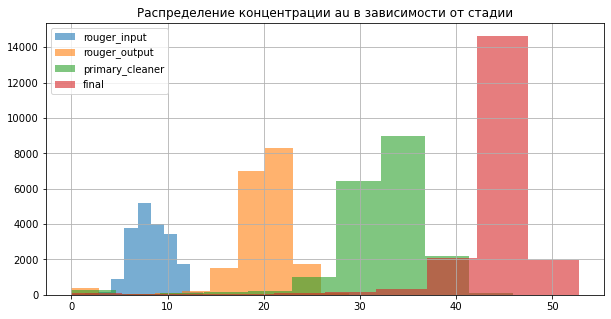

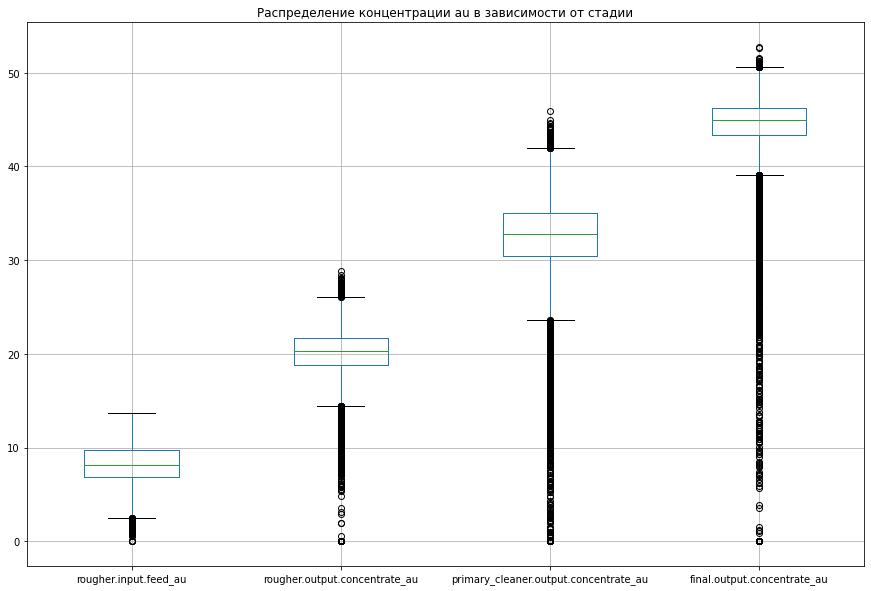

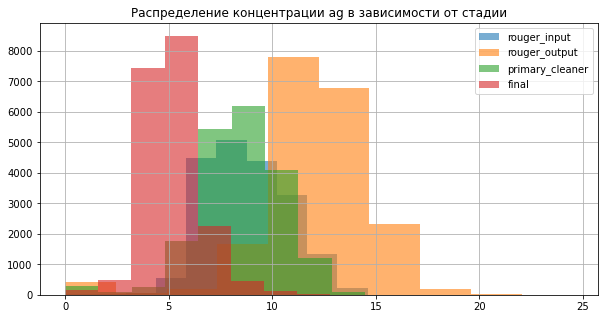

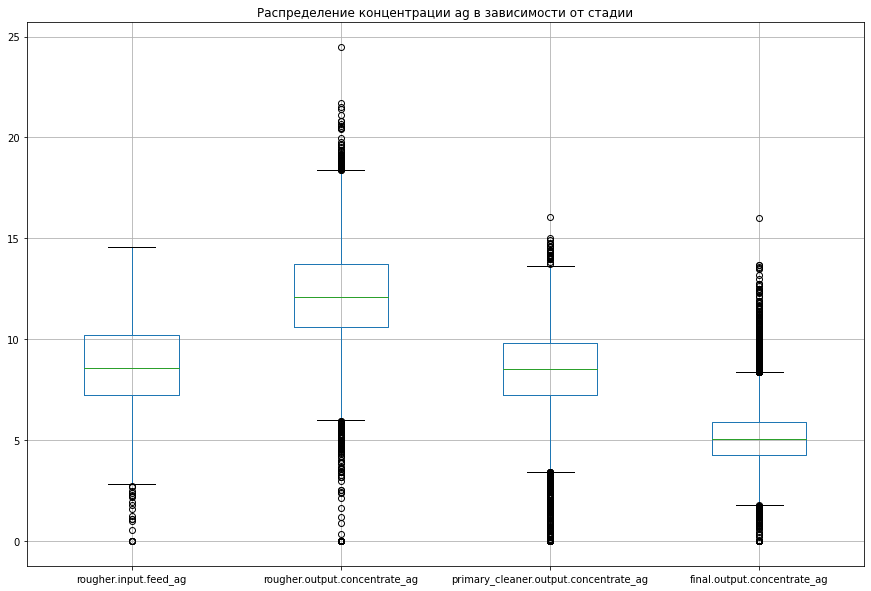

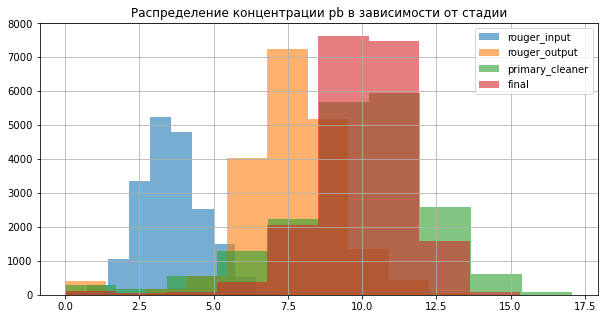

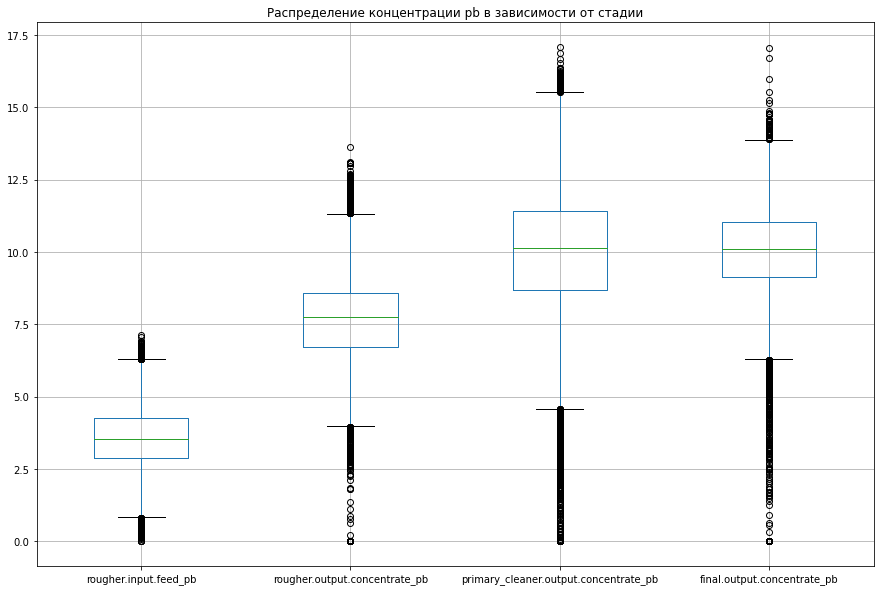

In [19]:
metals = {'au':['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au'],
       'ag':['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],
       'pb':['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']}
names = ['rouger_input','rouger_output','primary_cleaner','final']
i = 0  
for metal in metals:
    plt.figure(figsize=(10,5))
    for i in range(len(metals[metal])):
        data_full[metals[metal][i]].hist(label=names[i], alpha=0.6)
    plt.title('Распределение концентрации '+metal+' в зависимости от стадии')
    plt.legend()
    plt.show()
    plt.figure(figsize=(15,10))
    data_full[metals[metal]].boxplot()
    i +=1
    plt.title('Распределение концентрации '+metal+' в зависимости от стадии')
    plt.show()


Мы видим, что концентрация золота в продукте растёт с кажой стадией очистки: если на входе концентрация чаще всего находится в диапазоне от 5 до 10, то после флотации - уже в диапазоне от 15 до 25, после первичной очистки - от 27 до 37, в финальном концентрате - от 37 до 50. Также от стадии к стадии увеличивается частота, с которой встречаются образцы с более высоким содержанием золота. Таким образом, процесс очистки, очевидно, выполняет свою функцию. При этом разброс концентрации золота в продукте увеличивается с каждой следующей стадией очистки., т.е. чем больше очищается руда, тем более разнородными получаются результаты. Вероятно, это во многом зависит от исходных качеств руды. На диаграмме видны заметные выбросы. В частности, концентрации золота, близкие к нулю.  В рабочей задаче необходимо было бы выяснить, насколько эти значения корректны, т.к. дело может быть как в некачественном сырье или проблемах технологического процесса (объективные причина), так и в ошибках измерений. Поскольку причин мы не знаем, а наличие таких аномалий может существенно влиять на работу моделей, избавимся от самых значительных из них, используя правило трёх сигм.     
Концентрация серебра изначально находится примерно на том же уровне, что и концентрация золота, после флотации также увеличивается (по всей видимости этот процесс подходит и для выделения серебра), но после первичной очистки снижается и в финальном концентрате чаще всего находится в диапазоне от 3 до 7. Разброс концентрации серебра значительно ниже, чем разброс концентрации золота, но выбросы так же присутствуют.  
Концентрация свинца в перчисном сырье ниже, чем золота и серебра и находится в диапазоне от 2,5 до 5. В процессе очистки она постепенно растет, но гораздо медленнее, чем у золота. В финальном продукте концентрация чаще всего находится в диапазоне от 7,5 до 12,5. Очевидно, отделять свинец от золота при такой организации технологического процесса получается хуже, чем серебро. Разброс концентрации свинца сравнительно небольшой, но выбросы также заметны.

In [20]:
# удалим выбросы из датафреймов. Для этого сощздаем перечень столбцов, в которые вносим изменения

columns = ['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
           'final.output.concentrate_au','rougher.input.feed_ag','rougher.output.concentrate_ag',
           'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag','rougher.input.feed_pb',
           'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
           'final.output.concentrate_pb']

# исключаем значения столбцов, которые отклоняются больше или меньше трех стандартных отклонений от среднего
data = [data_full,data_train]
for df in data:
    for column in columns:
        lower = df[column].mean()-3*df[column].std()
        upper = df[column].mean()+3*df[column].std()
        df = df[(df[column]>lower)&(df[column]<upper)]

# для тестовой выборки отдельынй цикл, т.к. в ней отсутсвуют данные о концентрации элементов 
for column in ['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']:
    lower = data_train[column].mean()-3*data_train[column].std()
    upper = data_train[column].mean()+3*data_train[column].std()
    data_train = data_train[(data_train[column]>lower)&(data_train[column]<upper)]

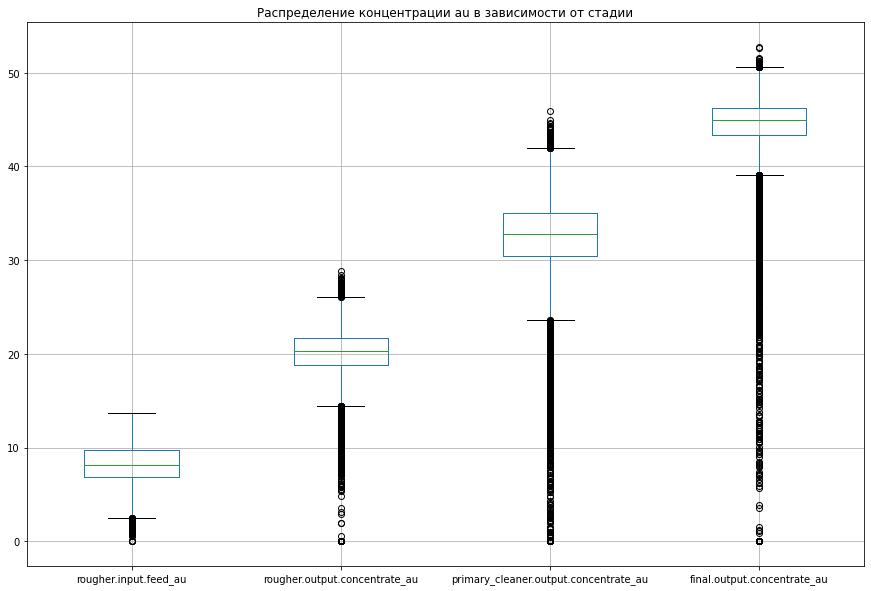

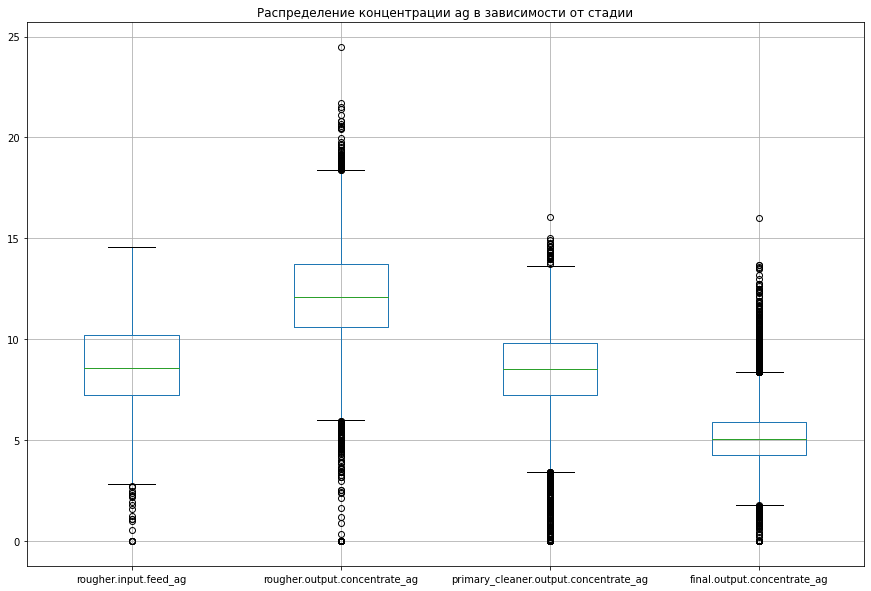

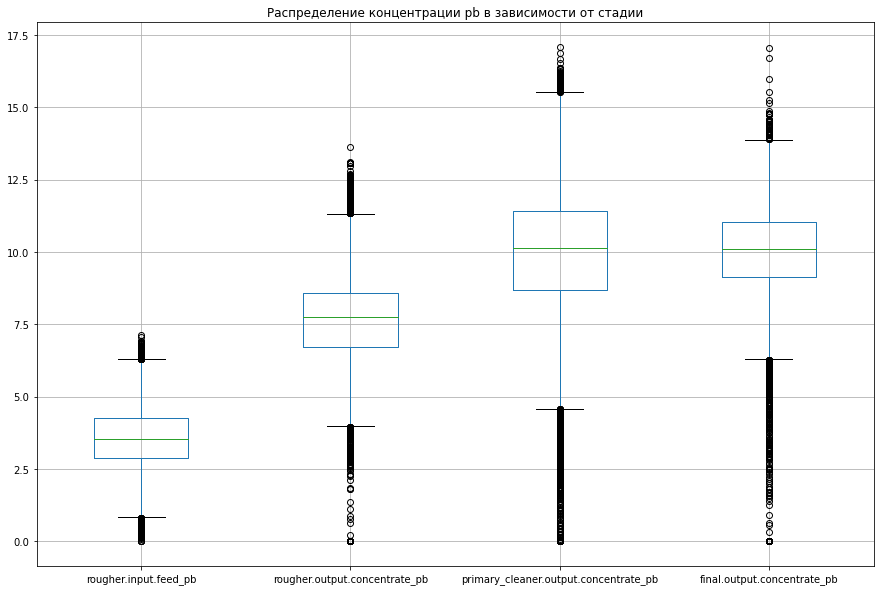

In [21]:
# выведем диаграммы после удаления выбросов
metals = {'au':['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au'],
       'ag':['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],
       'pb':['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']}
names = ['rouger_input','rouger_output','primary_cleaner','final']
 
for metal in metals:
    plt.figure(figsize=(15,10))
    data_full[metals[metal]].boxplot()
    plt.title('Распределение концентрации '+metal+' в зависимости от стадии')
    plt.show()


Исходные данные изначально представлены в виде обучающей и тестовой выборок. Чтобы оценить возможность использования разделенных подобным образом выборок для обучения и тестирования модели, необходимо оценить, насколько они однородны. Поскольку многие показатели в выборках существенно зависят от свойств исходного сырья, наиболее подходящим признаком для сравнения будет размер гранул сырья: он должен распределяться примерно одинаково независимо от концентрации веществ.  
Оценим распределение размера гранул сырья исходного сырья и продукта после флотации для обучающей и тестовой выборок.  
Также оценим средние значения размеров гранул в выборках

Средний размер частиц в обучающей выборке 60.05074145899374
Средний размер частиц в тестовой выборке 55.9528353123952


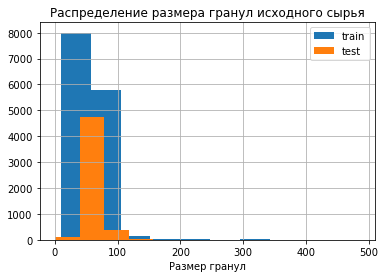

In [22]:
data_train['rougher.input.feed_size'].hist(label='train')
data_test['rougher.input.feed_size'].hist(label='test')
plt.legend()
plt.xlabel('Размер гранул')
plt.title('Распределение размера гранул исходного сырья')
print('Средний размер частиц в обучающей выборке',data_train['rougher.input.feed_size'].mean())
print('Средний размер частиц в тестовой выборке',data_test['rougher.input.feed_size'].mean())

Средний размер частиц в обучающей выборке 7.328292407922232
Средний размер частиц в тестовой выборке 7.266339191270909


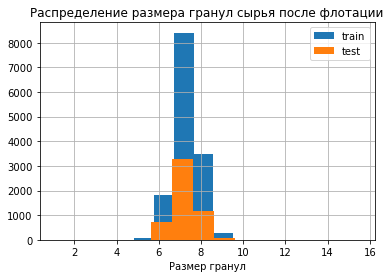

In [23]:
data_train['primary_cleaner.input.feed_size'].hist(label='train')
data_test['primary_cleaner.input.feed_size'].hist(label='test')
plt.legend()
plt.xlabel('Размер гранул')
plt.title('Распределение размера гранул сырья после флотации')
print('Средний размер частиц в обучающей выборке',data_train['primary_cleaner.input.feed_size'].mean())
print('Средний размер частиц в тестовой выборке',data_test['primary_cleaner.input.feed_size'].mean())

По диаграммам видно, что распределения размеров гранул в обучающей и тестовой выборках лежат в одних пределах и похожи по форме.  
Средние значения для сырья после флотации очень близки. Для исходного сырья разница составляет около 5 микронов, что также немного.  
Чтобы убедиться в значимости небольшого различия между выборками, с помощью метода bootstrap сгенерируем 1000 случайных выборок на базе обучающей и тестовой, сформируем список различий между ними и оценим среднее значение этих различий, на основании которого можно будет сделать вывод, насколько дпугие сформирвоанные подобным способом выборки будут различаться между собой по признаку размера гранул. Также оценим отклонения на 95% доверительном интервале.

In [24]:
bootstrap_samples = 1000
state = np.random.RandomState(42)
rougher_input_difference = data_train['rougher.input.feed_size'].mean()-data_test['rougher.input.feed_size'].mean()
primary_cleaner_input_difference = data_train['primary_cleaner.input.feed_size'].mean()-data_test['primary_cleaner.input.feed_size'].mean()
rougher_input_difference_list = []
primary_cleaner_input_difference_list = []
rougher_input_difference_counter = 0
primary_cleaner_input_difference_counter = 0

for i in range(bootstrap_samples):
    train_subsample = data_train[['rougher.input.feed_size','primary_cleaner.input.feed_size']].sample(frac=1, replace=True, random_state = state)
    test_subsample = data_train[['rougher.input.feed_size','primary_cleaner.input.feed_size']].sample(frac=1, replace=True, random_state = state)
    rougher_input_supsample_difference = train_subsample['rougher.input.feed_size'].mean()-test_subsample['rougher.input.feed_size'].mean()
    primary_cleaner_input_supsample_difference = train_subsample['primary_cleaner.input.feed_size'].mean()-test_subsample['primary_cleaner.input.feed_size'].mean()
    rougher_input_difference_list.append(rougher_input_supsample_difference)
    primary_cleaner_input_difference_list.append(primary_cleaner_input_supsample_difference)

print('Среднее отклонение средних значений показателя "rougher.input.feed_size" на обучающей и тестовой выборках: {:.6f}'.format(pd.Series(rougher_input_difference_list).mean()))
print('Среднее отклонение средних значений показателя "primary_cleaner" на обучающей и тестовой выборках: {:.6f}'.format(pd.Series(primary_cleaner_input_difference_list).mean()))
print('С вероятностью 95% отклонения средних значений показателя "rougher.input.feed_size" лежат в диапазоне от',pd.Series(rougher_input_difference_list).quantile(0.025),'до',pd.Series(rougher_input_difference_list).quantile(0.975))
print('С вероятностью 95% отклонения средних значений показателя "rougher.input.feed_size" лежат в диапазоне от',pd.Series(primary_cleaner_input_difference_list).quantile(0.025),'до',pd.Series(primary_cleaner_input_difference_list).quantile(0.975))

Среднее отклонение средних значений показателя "rougher.input.feed_size" на обучающей и тестовой выборках: 0.000453
Среднее отклонение средних значений показателя "primary_cleaner" на обучающей и тестовой выборках: 0.000266
С вероятностью 95% отклонения средних значений показателя "rougher.input.feed_size" лежат в диапазоне от -0.5425279635108191 до 0.5369135274187288
С вероятностью 95% отклонения средних значений показателя "rougher.input.feed_size" лежат в диапазоне от -0.013653301387434213 до 0.014750285730236977


Таким образом, мы видим, что отклонения средних размеров гранул сырья на подвыборках, полученных методом бутстрепа, невелики. Из этого можно сделать вывод, что обучающая и тестовая выборка по данному параметру различаются несущественно.

## Подбор и обучение модели.

### Подготовка выборок

Обучающая выборка содержит признаки, которые либо являются расчетными, либо появляются через какое-то время после получения данных. Некорректно использовать их для обучения моделей. Поэтому в качестве признаков для обучения возьмем только те, которые есть в нашем распоряжении изначально. Они соответствуют столбцам тестовой выборки.  
Очевидно, что для предсказания recovery для флотации некорректно использовать все признаки, т.к. на этот показатель влияют только характеристики сырья на входе и параметры самого процесса. Поэтому будем для каждого целевого значения обучать отдельную модель с разным набором обучающих признаков.  
В связи с этим для расчёта метрики sMAPE также создадим две функции: функцию для расчета промежуточных sMAPE отдельно для каждого целевого показателя и функцию для расчета общего sMAPE на основании промежуточных.  
Функцию для расчета промежуточных sMAPE используем также как целевую метрику при подборе гиперпараметров.  
Поскольку размерность данных в выборках заметно различается, для корректной работы моделей их необходимо масштабировать.

In [25]:
# Функции для расчета sMAPE
def smape_scorer(target,predictions):
    n = len(target)
    smape = 1/n*sum(abs(target-predictions)/((abs(target)+abs(predictions))/2))
    return smape

smape_score = make_scorer(smape_scorer, greater_is_better=False)  

def total_smape_scorer(smape_rougher,smape_final):
    total_smape = smape_rougher*0.25 + smape_final*0.75
    return total_smape

In [26]:
# Разделение данных на признаки и целевые признаки для каждой модели

features_train_final = data_train[data_test.columns.to_list()].drop(['rougher.output.recovery','final.output.recovery'],axis=1)
features_train_rougher = features_train_final.loc[:,'rougher.input.feed_ag':'rougher.state.floatbank10_f_level']
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']
features_test_final = data_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
features_test_rougher = features_test_final.loc[:,'rougher.input.feed_ag':'rougher.state.floatbank10_f_level']
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

print(features_test_final.shape, features_test_rougher.shape, target_test_rougher.shape,target_test_final.shape)
print(features_train_final.shape, features_train_rougher.shape, target_train_rougher.shape,target_train_final.shape)

(5290, 52) (5290, 22) (5290,) (5290,)
(14045, 52) (14045, 22) (14045,) (14045,)


In [27]:
# масштабируем признаки для флотации
columns = features_train_rougher.columns.to_list()
scaler = StandardScaler()
scaler.fit(features_train_rougher[columns])
features_train_rougher[columns] = scaler.transform(features_train_rougher[columns])
features_test_rougher[columns] = scaler.transform(features_test_rougher[columns])

# масштабируем признаки для процесса
columns = features_train_final.columns.to_list()
scaler.fit(features_train_final[columns])
features_train_final[columns] = scaler.transform(features_train_final[columns])
features_test_final[columns] = scaler.transform(features_test_final[columns])

# проверяем
display(features_train_rougher.head())
display(features_test_rougher.head())
print()
display(features_train_final.head())
display(features_test_final.head())

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-1.335,-1.154,0.480,-0.198,0.098,-0.765,0.062,0.136,0.115,0.172,-0.734,-0.364,1.537,0.511,1.415,0.405,1.843,0.250,1.707,0.163,2.173,0.221
2016-01-15 01:00:00,-1.303,-1.172,0.497,-0.120,-0.120,-0.769,0.058,0.134,0.157,0.178,-0.731,-0.321,1.525,0.246,1.406,0.269,1.850,0.274,1.679,0.244,2.078,0.253
2016-01-15 02:00:00,-1.327,-1.271,0.542,-0.110,-0.075,-0.832,0.042,0.307,0.137,0.322,-0.734,-0.322,1.517,0.245,1.403,0.266,1.847,0.274,1.679,0.261,2.081,0.246
2016-01-15 03:00:00,-1.366,-1.385,0.663,-0.098,0.109,-0.963,-0.047,0.313,0.077,0.316,-0.733,-0.323,1.521,0.234,1.404,0.267,1.837,0.271,1.688,0.259,2.081,0.259
2016-01-15 04:00:00,-1.356,-1.620,0.644,-0.174,-0.411,-1.208,-0.252,0.309,-0.117,0.315,-0.734,-0.318,1.522,0.252,1.406,0.265,1.847,0.275,1.692,0.280,2.086,0.248


,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,2.422,1.978,0.155,0.115,1.177,2.253,1.570,0.268,1.446,0.282,-0.721,0.208,-0.387,1.130,-0.234,1.169,-0.057,1.178,-0.475,1.150,-0.488,1.169
2016-09-01 01:59:59,2.373,1.875,0.158,0.083,1.004,2.164,1.595,0.128,1.480,0.170,-0.740,0.206,-0.394,1.115,-0.235,1.165,-0.047,1.170,-0.473,1.151,-0.484,1.035
2016-09-01 02:59:59,2.427,1.782,0.153,0.297,1.285,2.257,1.591,-0.007,1.476,0.058,-0.741,0.213,-0.399,1.110,-0.241,1.139,-0.050,1.154,-0.473,1.155,-0.484,1.122
2016-09-01 03:59:59,2.033,1.490,0.028,-0.008,0.978,2.306,1.451,-0.051,1.353,0.020,-0.731,0.209,-0.378,1.138,-0.231,1.163,-0.052,1.213,-0.462,1.134,-0.481,1.140
2016-09-01 04:59:59,1.459,1.166,0.140,0.141,1.021,1.825,0.557,-0.109,0.595,-0.028,-0.753,0.205,-0.088,1.123,0.031,1.175,0.182,1.153,-0.155,1.160,-0.487,1.150


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.167,0.372,-0.128,0.289,-0.449,-0.284,-0.432,-0.810,-0.436,-0.255,0.045,-0.212,-1.335,-1.154,0.480,-0.198,0.098,-0.765,0.062,0.136,0.115,0.172,-0.734,-0.364,1.537,0.511,1.415,0.405,1.843,0.250,1.707,0.163,2.173,0.221,-0.658,0.061,-0.167,0.036,-0.932,-0.312,-0.141,-0.249,-1.050,-0.469,-0.640,-0.758,-1.170,-0.380,-0.860,-0.422,-0.938,-2.662
2016-01-15 01:00:00,-0.205,0.422,-0.128,0.326,-0.244,-0.340,-0.245,-0.318,-0.241,-0.273,0.118,-0.328,-1.303,-1.172,0.497,-0.120,-0.120,-0.769,0.058,0.134,0.157,0.178,-0.731,-0.321,1.525,0.246,1.406,0.269,1.850,0.274,1.679,0.244,2.078,0.253,-0.653,0.036,-0.168,0.052,-0.930,-0.401,-0.112,-0.251,-1.055,-0.529,-0.668,-0.700,-1.150,-0.429,-0.877,-0.424,-0.964,-2.499
2016-01-15 02:00:00,-0.251,0.726,-0.128,0.295,-0.047,-0.314,-0.059,-0.340,-0.048,-0.317,0.207,-0.347,-1.327,-1.271,0.542,-0.110,-0.075,-0.832,0.042,0.307,0.137,0.322,-0.734,-0.322,1.517,0.245,1.403,0.266,1.847,0.274,1.679,0.261,2.081,0.246,-0.632,0.037,-0.168,0.059,-0.940,-0.389,0.262,-0.262,-1.050,-0.470,-0.675,-0.697,-1.145,-0.428,-0.872,-0.423,-0.959,-2.543
2016-01-15 03:00:00,-0.291,0.728,-0.128,0.310,-0.059,-0.341,-0.057,-0.313,-0.061,-0.313,0.211,-0.352,-1.366,-1.385,0.663,-0.098,0.109,-0.963,-0.047,0.313,0.077,0.316,-0.733,-0.323,1.521,0.234,1.404,0.267,1.837,0.271,1.688,0.259,2.081,0.259,-0.642,0.050,-0.157,0.061,-0.931,-0.399,0.261,-0.263,-1.047,-0.437,-0.659,-0.698,-1.162,-0.403,-0.878,-0.416,-0.963,-2.505
2016-01-15 04:00:00,-0.400,0.903,-0.128,0.345,-0.048,-0.286,-0.051,-0.332,-0.066,-0.317,0.219,-0.364,-1.356,-1.620,0.644,-0.174,-0.411,-1.208,-0.252,0.309,-0.117,0.315,-0.734,-0.318,1.522,0.252,1.406,0.265,1.847,0.275,1.692,0.280,2.086,0.248,-0.628,0.031,-0.157,0.049,-0.927,-0.401,0.262,-0.264,-1.048,-0.417,-0.668,-0.696,-1.170,-0.469,-0.893,-0.419,-0.964,-2.545


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,1.975,1.819,1.233,0.332,-1.623,-0.321,-1.592,-0.320,-1.550,-0.312,-0.512,-0.340,2.422,1.978,0.155,0.115,1.177,2.253,1.570,0.268,1.446,0.282,-0.721,0.208,-0.387,1.130,-0.234,1.169,-0.057,1.178,-0.475,1.150,-0.488,1.169,-0.816,0.028,-1.658,0.058,-1.632,0.507,-1.730,0.929,-1.404,-0.377,-1.416,-0.700,-1.510,1.359,-1.419,-0.411,1.239,0.193
2016-09-01 01:59:59,2.093,1.818,1.233,0.293,-1.624,-0.316,-1.601,-0.316,-1.579,-0.271,-0.510,-0.360,2.373,1.875,0.158,0.083,1.004,2.164,1.595,0.128,1.480,0.170,-0.740,0.206,-0.394,1.115,-0.235,1.165,-0.047,1.170,-0.473,1.151,-0.484,1.035,-0.818,0.039,-1.661,0.046,-1.637,0.512,-1.708,0.924,-1.398,-0.395,-1.394,-0.672,-1.508,-1.105,-1.417,-0.414,0.947,0.190
2016-09-01 02:59:59,2.090,1.192,0.752,0.308,-1.626,-0.339,-1.594,-0.315,-1.565,-0.353,-0.510,-0.345,2.427,1.782,0.153,0.297,1.285,2.257,1.591,-0.007,1.476,0.058,-0.741,0.213,-0.399,1.110,-0.241,1.139,-0.050,1.154,-0.473,1.155,-0.484,1.122,-0.821,0.031,-1.650,0.042,-1.628,0.509,-1.711,0.933,-1.415,-0.396,-1.401,-0.692,-1.488,-0.445,-1.413,-0.405,0.943,0.168
2016-09-01 03:59:59,2.091,0.931,0.511,-0.044,-1.618,-0.283,-1.605,-0.299,-1.550,-0.246,-0.505,-0.373,2.033,1.490,0.028,-0.008,0.978,2.306,1.451,-0.051,1.353,0.020,-0.731,0.209,-0.378,1.138,-0.231,1.163,-0.052,1.213,-0.462,1.134,-0.481,1.140,-0.823,0.046,-1.663,0.060,-1.629,0.526,-1.724,0.937,-1.402,-0.388,-1.405,-0.669,-1.518,-0.447,-1.408,-0.409,0.935,0.220
2016-09-01 04:59:59,1.676,0.537,0.331,-0.198,-1.605,-0.337,-1.600,-0.307,-1.534,-0.315,-0.510,-0.338,1.459,1.166,0.140,0.141,1.021,1.825,0.557,-0.109,0.595,-0.028,-0.753,0.205,-0.088,1.123,0.031,1.175,0.182,1.153,-0.155,1.160,-0.487,1.150,-0.825,0.047,-1.653,0.055,-1.641,0.503,-1.725,0.925,-1.404,-0.436,-1.409,-0.685,-1.482,-0.675,-1.404,-0.419,0.944,0.162


### Константная модель

В качестве константной модели для оценки адекватности моделей возьмём модель, котоаря всегда предсказывала бы средние значения.

In [28]:
# smape для константной модели: среднее значение recovery
predictions_rougher_const = pd.Series(target_train_rougher.mean(),index=target_train_rougher.index)
predictions_final_const = pd.Series(target_train_final.mean(),index=target_train_final.index)
smape_rougher_constant = smape_scorer(target_train_rougher,predictions_rougher_const)
smape_final_constant = smape_scorer(target_train_final,predictions_final_const)
smape_total_constant = smape_rougher_constant*0.25 + smape_final_constant*0.75
print('Константный sMAPE для коэффициента эффективности флотации:', smape_rougher_constant)
print('Константный sMAPE для коэффициента эффективности процесса:', smape_final_constant)
print('Общий константный sMAPE:', smape_total_constant)

Константный sMAPE для коэффициента эффективности флотации: 0.11710038201384967
Константный sMAPE для коэффициента эффективности процесса: 0.10893561585935504
Общий константный sMAPE: 0.11097680739797869


### Дерево решений

In [29]:
%%time
model = DecisionTreeRegressor(random_state=12345)
parametrs_dt_rougher = {'max_depth':range(1,20),
                        'min_samples_split':range(10,200,5), 
                        'min_samples_leaf':range(1,50,1)}
df_dt_params_rougher = RandomizedSearchCV(model,parametrs_dt_rougher,n_jobs=2, scoring=smape_score)
df_dt_params_rougher.fit(features_train_rougher, target_train_rougher)
print('Лучшие гиперпараметры:',df_dt_params_rougher.best_params_)
print('Лучший sMAPE для флотации:',-df_dt_params_rougher.best_score_)


if -df_dt_params_rougher.best_score_ < smape_final_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучшие гиперпараметры: {'min_samples_split': 15, 'min_samples_leaf': 37, 'max_depth': 3}
Лучший sMAPE для флотации: 0.12138296706394347
Показатель хуже константного.
Wall time: 5.4 s


In [30]:
%%time
model = DecisionTreeRegressor(random_state=12345)
parametrs_dt_final = {'max_depth':range(1,20),
                        'min_samples_split':range(10,200,5), 
                        'min_samples_leaf':range(1,50,1)}
df_dt_params_final = RandomizedSearchCV(model,parametrs_dt_final,n_jobs=2, scoring=smape_score)
df_dt_params_final.fit(features_train_final, target_train_final)
print('Лучшие гиперпараметры:',df_dt_params_final.best_params_)
print('Лучший sMAPE для процесса:',-df_dt_params_final.best_score_)

if -df_dt_params_final.best_score_ < smape_final_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучшие гиперпараметры: {'min_samples_split': 40, 'min_samples_leaf': 44, 'max_depth': 11}
Лучший sMAPE для процесса: 0.11151424421133826
Показатель хуже константного.
Wall time: 9.72 s


In [31]:
total_smape_dt = total_smape_scorer(-df_dt_params_rougher.best_score_,-df_dt_params_final.best_score_)
print('Общий sMAPE для модели составляет:', total_smape_dt)
if total_smape_dt < smape_total_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Общий sMAPE для модели составляет: 0.11398142492448957
Показатель хуже константного.


### Линейная регрессия

In [32]:
%%time
model = LinearRegression(n_jobs=4)
parametrs_rougher = {'fit_intercept':[True,False],
            'normalize':[True,False],
            'copy_X':[True,False]}
lr_params_rougher = GridSearchCV(model,parametrs_rougher,n_jobs=2, scoring=smape_score)
lr_params_rougher.fit(features_train_rougher, target_train_rougher)
print('Лучшие гиперпараметры:', lr_params_rougher.best_params_)
print('Лучший sMAPE для флотации:',-lr_params_rougher.best_score_)

if -lr_params_rougher.best_score_ < smape_rougher_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучшие гиперпараметры: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Лучший sMAPE для флотации: 0.12141666619612275
Показатель хуже константного.
Wall time: 417 ms


In [33]:
%%time
model = LinearRegression(n_jobs=4)
parametrs_final = {'fit_intercept':[True,False],
            'normalize':[True,False],
            'copy_X':[True,False]}
lr_params_final = GridSearchCV(model,parametrs_final,n_jobs=2, scoring=smape_score)
lr_params_final.fit(features_train_final, target_train_final)
print('Лучшие гиперпараметры:', lr_params_final.best_params_)
print('Лучший sMAPE для флотации:',-lr_params_final.best_score_)

if -lr_params_final.best_score_ < smape_rougher_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучшие гиперпараметры: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Лучший sMAPE для флотации: 0.11890660782535718
Показатель хуже константного.
Wall time: 628 ms


In [34]:
total_smape_lr = total_smape_scorer(-lr_params_rougher.best_score_,-lr_params_final.best_score_)
print('Общий sMAPE для модели составляет:', total_smape_dt)
if total_smape_lr < smape_total_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Общий sMAPE для модели составляет: 0.11398142492448957
Показатель хуже константного.


### Случайный лес

In [35]:
%%time
model = RandomForestRegressor(random_state=12345)
parametrs_rf_rougher = {'n_estimators':range(10, 100, 5),
                        'max_depth':range(1, 21)} 
df_rf_params_rougher = RandomizedSearchCV(model,parametrs_rf_rougher,n_jobs=2, scoring=smape_score)
df_rf_params_rougher.fit(features_train_rougher, target_train_rougher)
print('Лучшие гиперпараметры:',df_rf_params_rougher.best_params_)
print('Лучший sMAPE для флотации:', -df_rf_params_rougher.best_score_)

if -df_rf_params_rougher.best_score_ < smape_rougher_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучшие гиперпараметры: {'n_estimators': 95, 'max_depth': 4}
Лучший sMAPE для флотации: 0.11769587977063037
Показатель хуже константного.
Wall time: 2min 33s


In [36]:
%%time
model = RandomForestRegressor(random_state=12345)
parametrs_rf_final = {'n_estimators':range(10, 100, 5),
                'max_depth':range(1, 21)} 
df_rf_params_final = RandomizedSearchCV(model,parametrs_rf_final,n_jobs=2, scoring=smape_score)
df_rf_params_final.fit(features_train_final, target_train_final)
print('Лучшие гиперпараметры:',df_rf_params_final.best_params_)
print('Лучший sMAPE для процесса:', -df_rf_params_final.best_score_)

if -df_rf_params_final.best_score_ < smape_final_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучшие гиперпараметры: {'n_estimators': 15, 'max_depth': 5}
Лучший sMAPE для процесса: 0.09835331693520902
Показатель лучше константного.
Wall time: 5min 40s


In [37]:
total_smape_rf = total_smape_scorer(-df_rf_params_rougher.best_score_,-df_rf_params_final.best_score_)
print('Общий sMAPE для модели составляет:', total_smape_dt)
if total_smape_rf < smape_total_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Общий sMAPE для модели составляет: 0.11398142492448957
Показатель лучше константного.


### Бэггинг

In [38]:
%%time
base_estimators = [DummyRegressor(),KNeighborsRegressor(),LinearSVR(), DecisionTreeRegressor()]
model_names = ['DummyRegressor','KNeighborsRegressor','LinearSVR', 'DecisionTreeRegressor']
i=0
best_model = None
best_model_name = None
best_score = smape_total_constant
best_score_r = 0
best_score_f = 0

for estimator in base_estimators:
    print('Модель:', model_names[i])
    model = BaggingRegressor(base_estimator=estimator,n_estimators=10, random_state=12345)
    model.fit(features_train_rougher, target_train_rougher)
    score_rougher = cross_val_score(model,features_train_rougher,target_train_rougher,cv=10, scoring=smape_score)
    score_r = -np.mean(score_rougher)
    print('Лучший sMAPE для флотации:', score_r)

    model = BaggingRegressor(base_estimator=estimator,n_estimators=10, random_state=12345)
    model.fit(features_train_final, target_train_final)
    score_final = cross_val_score(model,features_train_final,target_train_final,cv=10, scoring=smape_score)
    score_f = -np.mean(score_final)
    print('Лучший sMAPE для процесса:', score_f)

    score_total = total_smape_scorer(score_r,score_f)
    print('Лучший общий sMAPE:', score_total)

    if score_total < smape_total_constant:
        print('Показатель лучше константного.')
        best_model = model
        best_model_name = model_names[i]
        best_score = score_total
        best_score_r = score_r
        best_score_f = score_f
    else:
        print('Показатель хуже константного.')
    i +=1
    print()
    
print('Лучший алгоритм:', best_model_name, 'с лучшим sMAPE:', best_score)

Модель: DummyRegressor
Лучший sMAPE для флотации: 0.1207655005202225
Лучший sMAPE для процесса: 0.11174119645801603
Лучший общий sMAPE: 0.11399727247356764
Показатель хуже константного.

Модель: KNeighborsRegressor
Лучший sMAPE для флотации: 0.1199228799095033
Лучший sMAPE для процесса: 0.12055663253711905
Лучший общий sMAPE: 0.12039819438021511
Показатель хуже константного.

Модель: LinearSVR
Лучший sMAPE для флотации: 0.10052574412993676
Лучший sMAPE для процесса: 0.10622005072525346
Лучший общий sMAPE: 0.10479647407642428
Показатель лучше константного.

Модель: DecisionTreeRegressor
Лучший sMAPE для флотации: 0.13429593518966826
Лучший sMAPE для процесса: 0.11754302856100067
Лучший общий sMAPE: 0.12173125521816756
Показатель хуже константного.

Лучший алгоритм: LinearSVR с лучшим sMAPE: 0.10479647407642428
Wall time: 3min 7s


### Сводные данные по моделям

In [53]:
results = pd.DataFrame({'model':['Constant','Decision Tree', 'Random Forest', 'Linear Regression', 'Bagging'],
                    'sMAPE rougher' : [smape_rougher_constant,-df_dt_params_rougher.best_score_,-df_rf_params_rougher.best_score_,-lr_params_rougher.best_score_, best_score_r],
                    'sMAPE final' : [smape_final_constant, -df_dt_params_final.best_score_,-df_rf_params_final.best_score_,-lr_params_final.best_score_, best_score_f],
                    'sMAPE total' : [smape_total_constant, total_smape_dt,total_smape_lr,total_smape_rf, best_score]})
display(results)

,model,sMAPE rougher,sMAPE final,sMAPE total
0,Constant,0.117,0.109,0.111
1,Decision Tree,0.121,0.112,0.114
2,Random Forest,0.118,0.098,0.120
3,Linear Regression,0.121,0.119,0.103
4,Bagging,0.101,0.106,0.105


Таким образом, лучший результат получен с помощью алгоритма Случайного леса. Проведем на ней тестирование.

## Тестирование лучшей модели

In [62]:
best_model_rougher = LinearRegression( 
                              fit_intercept = lr_params_rougher.best_params_['fit_intercept'],
                              normalize = lr_params_rougher.best_params_['normalize'],
                              copy_X = lr_params_rougher.best_params_['copy_X'])
best_model_rougher.fit(features_train_rougher, target_train_rougher)
predictions_test_rougher = best_model_rougher.predict(features_test_rougher)
best_smape_rougher = smape_scorer(target_test_rougher, predictions_test_rougher)

print('Лучший sMAPE для флотации на тестовой выборке:', best_smape_rougher)

if best_smape_rougher < smape_rougher_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучший sMAPE для флотации на тестовой выборке: 0.09389471869993797
Показатель лучше константного.


In [63]:
best_model_final = LinearRegression( 
                              fit_intercept = lr_params_final.best_params_['fit_intercept'],
                              normalize = lr_params_final.best_params_['normalize'],
                              copy_X = lr_params_final.best_params_['copy_X'])
best_model_final.fit(features_train_final, target_train_final)
predictions_test_final = best_model_final.predict(features_test_final)
best_smape_final = smape_scorer(target_test_final, predictions_test_final)

print('Лучший sMAPE для процесса на тестовой выборке:', best_smape_final)

if best_smape_final < smape_final_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучший sMAPE для процесса на тестовой выборке: 0.10107534190924698
Показатель лучше константного.


In [64]:
best_total_smape = total_smape_scorer(best_smape_rougher,best_smape_final)
print('Лучший итоговый sMAPE на тестовой выборке:', best_total_smape)

if best_total_smape < smape_total_constant:
    print('Показатель лучше константного.')
else:
    print('Показатель хуже константного.')

Лучший итоговый sMAPE на тестовой выборке: 0.09928018610691973
Показатель лучше константного.


## Общий вывод.


Таким образом, подготовлены и обучены две модели на основе алгоритма "Линейная регрессия":
1. Для предсказания показателя `rougher.output.recovery` (эффективность обогащения после флотации) на основании информации о сырье на входе, а также параметров процесса флотации.
2. Для предсказания показателя `final.output.recovery` (эффективность обогащения на выходе) на основании информации о сырье на входе, параметров процесса флотации, первичной и вторичной очистки.  

Для моделей были подобраны параметры, позволяющие получить лучший (наименьший) показатель метрики sMAPE с помощью метода кросс-валидации: copy_X = True, fit_intercept = True, normalize = True
  
При подборе гиперпараметров лучшее значение метрики sMAPE составило 0.103.  
На тестовой выборке лучшее значение метрики sMAPE составило 0.099.  